# Wine_Quality_Prediction

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [65]:
wine_dataset = pd.read_csv('winequality-red.csv')

In [66]:
# Shape
wine_dataset.shape

(1599, 12)

In [67]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis and Visualization

In [69]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


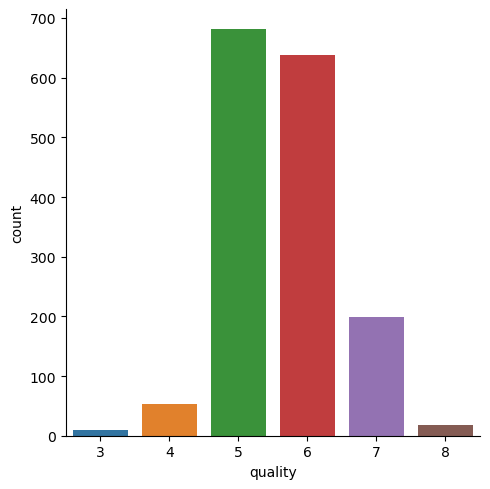

In [70]:
sns.catplot(x = 'quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

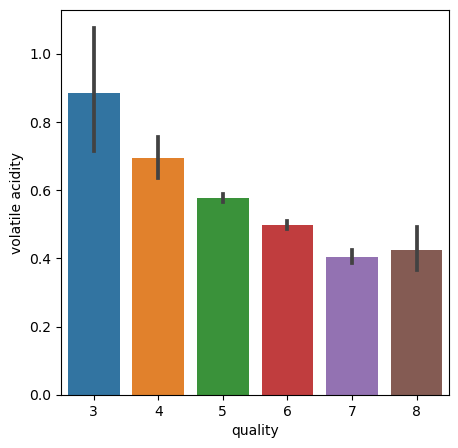

In [71]:
# Volatile acidity vs Quality  *Inversely*
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

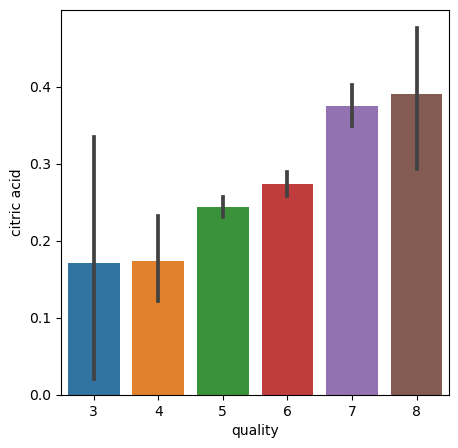

In [72]:
# Citric acid vs Quality  *Directly*
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataset)

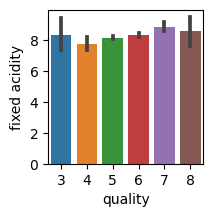

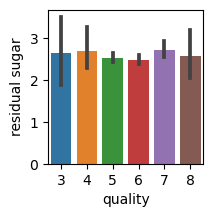

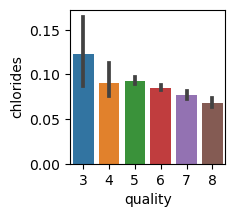

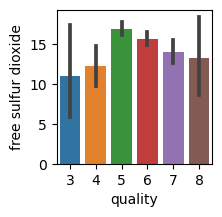

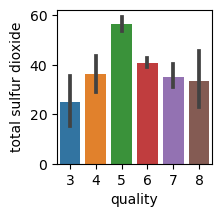

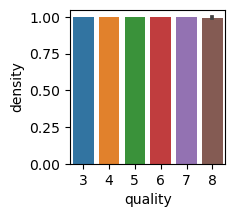

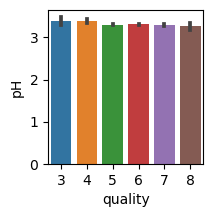

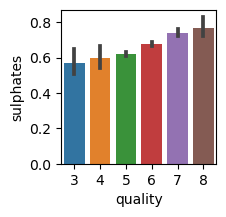

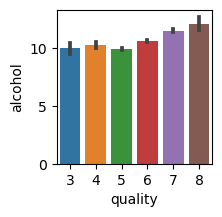

In [73]:
features = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

for y_data in features:
    plot = plt.figure(figsize=(2,2))
    sns.barplot(x = 'quality', y = y_data, data = wine_dataset)

### Correlation

#### 1. +ve Correlation
#### 2. -ve Correlation

In [74]:
correlation = wine_dataset.corr()

<Axes: >

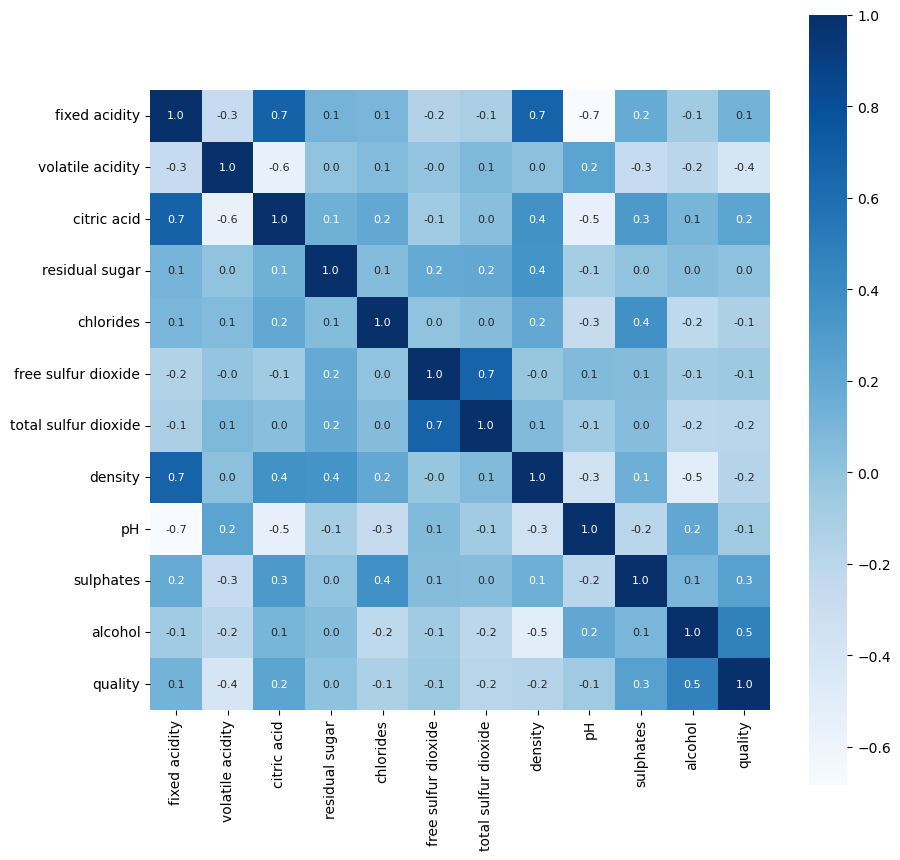

In [75]:
# Constructing the heatmap to understand the correlation between the columns

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

## Data-PreProcessing

In [76]:
# seperate features and label
X = wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Label Binarization

In [77]:
Y = wine_dataset['quality'].apply(lambda y_values: 1 if y_values>=7 else 0)

In [78]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


## Spliting Training and Test Data

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


## Model Training
### Random Forest Classifier

In [80]:
model = RandomForestClassifier()

In [81]:
model.fit(X_train, Y_train)

RandomForestClassifier()

## Model_Evaluation

### Accuracy Score

In [82]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [83]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.946875


## Logistic Regression

In [84]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train, Y_train)
y_pred = logr.predict(X_test)
test_data_acc = accuracy_score(y_pred, Y_test)

In [85]:
print('Accuracy : ', test_data_acc)

Accuracy :  0.896875


In [86]:
from xgboost import XGBClassifier

## XGBoost Model Evaluation

In [87]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred_xg = xgb.predict(X_test)
test_data_acc_xg = accuracy_score(y_pred_xg, Y_test)
print('Accuracy : ', test_data_acc_xg)

Accuracy :  0.93125


In [88]:
from sklearn import svm

## SVM Model Evaluation

In [89]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred_clf = clf.predict(X_test)
test_data_acc_clf = accuracy_score(y_pred_clf, Y_test)
print('Accuracy : ', test_data_acc_clf)

Accuracy :  0.884375


In [90]:
print('Random_Forest Accuracy : \t', test_data_accuracy)
print('Logistic_Reg. Accuracy : \t', test_data_acc)
print('XGBoost Accuracy : \t\t', test_data_acc_xg)
print('SVM Accuracy : \t\t\t', test_data_acc_clf)

Random_Forest Accuracy : 	 0.946875
Logistic_Reg. Accuracy : 	 0.896875
XGBoost Accuracy : 		 0.93125
SVM Accuracy : 			 0.884375
